## Final Project Submission

Please fill out:
* Student name: Mitchelle Aquinate Okubasu
* Student pace: part time
* Scheduled project review date/time: 5/05/2023
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

%matplotlib inline

### Project Overview:
Using exploratory data analysis to provide insights for Microsoft company

### Business Problem:
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Business Understanding:
1. To determine movie genres that are currently doing the best at box office and by the best, we will look at the popularity and world gross. 
2. To estimate the budget of producing a world class movie 

### Data Mining and Data Cleaning:

In [2]:
#loading movies df
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [3]:
movies_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [4]:
#removing some columns 
movies_df.drop(movies_df.iloc[:, :5], inplace=True, axis=1)

In [5]:
movies_df.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# renaming title column
movies_df.rename(columns={'title':'movie_title'})

,popularity,release_date,movie_title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,0.600,2018-10-01,The Last One,0.0,1
26515,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
#finding null value
movies_df.isnull().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

since there are no missing values, we work on the data as it is

In [8]:
#checking for duplicated values and dropping them if any
movies_df.duplicated().sum()

1020

In [9]:
movies_df.drop_duplicates(inplace=True)

In [10]:
movies_df.duplicated().sum()

0

### Data exploration:

In [11]:
#filtering the data to the most recent
movies_df['year'] = pd.DatetimeIndex(movies_df['release_date']).year
movies_df['month'] = pd.DatetimeIndex(movies_df['release_date']).month

In [12]:
movies_df

,popularity,release_date,title,vote_average,vote_count,year,month
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,27.920,2010-07-16,Inception,8.3,22186,2010,7
...,...,...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5
26514,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,0.600,2018-06-22,Trailer Made,0.0,1,2018,6


In [13]:
#filtering to the most recent years
movies_df['year'].value_counts()

2015    3066
2013    3066
2014    3052
2016    2970
2017    2921
        ... 
1930       1
1977       1
1960       1
1975       1
1936       1
Name: year, Length: 66, dtype: int64

In [18]:
movies_df = movies_df[movies_df['year'] > 2011]

<AxesSubplot:xlabel='year', ylabel='popularity'>

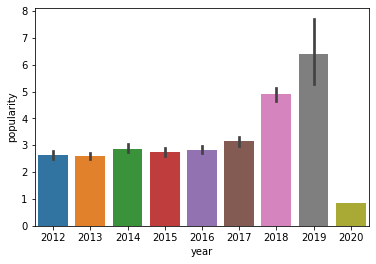

In [19]:
sns.barplot(data=movies_df, x="year", y="popularity")

In [20]:
#checking correlation between popularity and vote count
movies_df1 = movies_df.filter(['popularity','vote_average','vote_count'], axis=1)
movies_df1


,popularity,vote_average,vote_count
258,7.759,7.5,149
530,3.690,5.7,43
587,3.209,3.7,9
1110,1.400,5.3,6
1537,0.802,8.0,14
...,...,...,...
26512,0.600,0.0,1
26513,0.600,0.0,1
26514,0.600,0.0,1
26515,0.600,0.0,1


<AxesSubplot:>

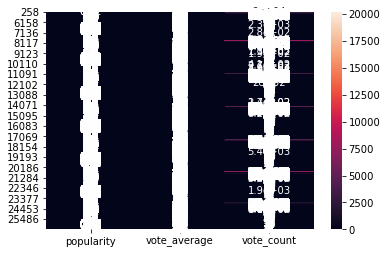

In [21]:
sns.heatmap(movies_df1, annot=True)

In [35]:
movies_df = movies_df.rename(columns={'title':'movie_title'})

In [36]:
movies_df

,popularity,release_date,movie_title,vote_average,vote_count,year,month
258,7.759,2012-03-02,Boy,7.5,149,2012,3
530,3.690,2014-04-04,Frankie & Alice,5.7,43,2014,4
587,3.209,2012-07-16,Seeing Heaven,3.7,9,2012,7
1110,1.400,2012-03-30,I Kissed a Vampire,5.3,6,2012,3
1537,0.802,2013-04-05,Stranger Things,8.0,14,2013,4
...,...,...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,5
26514,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,0.600,2018-06-22,Trailer Made,0.0,1,2018,6


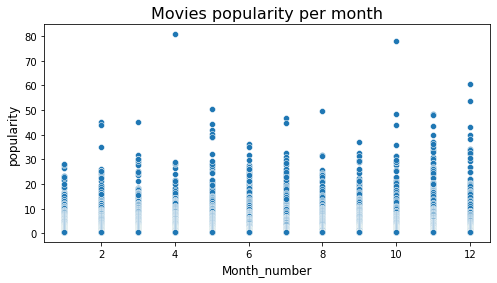

In [25]:
plt.figure(figsize = (8,4))
sns.scatterplot(x='month',y = 'popularity', data = movies_df, palette='viridis')
plt.title('Movies popularity per month', fontsize = 16)
plt.xlabel('Month_number', fontsize = 12)
plt.ylabel('popularity', fontsize = 12)
plt.show()

In [26]:
#loading another dataset
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [27]:
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [30]:
budget_df = budget_df.rename(columns={'movie':'movie_title'})

In [31]:
budget_df

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [32]:
#checking for missing values
budget_df.isnull().sum()

id                   0
release_date         0
movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
merged_df = movies_df.merge(budget_df, on = 'movie_title')

In [39]:
merged_df

,popularity,release_date_x,movie_title,vote_average,vote_count,year,month,id,release_date_y,production_budget,domestic_gross,worldwide_gross
0,15.336,2012-04-12,The Cabin in the Woods,6.5,4185,2012,4,11,"Apr 13, 2012","$30,000,000","$42,073,277","$70,689,968"
1,12.942,2012-01-27,The Grey,6.5,2280,2012,1,95,"Jan 27, 2012","$25,000,000","$51,580,136","$81,249,176"
2,7.518,2012-04-27,Bernie,6.6,503,2012,4,48,"Apr 27, 2012","$6,000,000","$9,204,489","$10,106,975"
3,50.289,2012-05-04,The Avengers,7.6,19673,2012,5,27,"May 4, 2012","$225,000,000","$623,279,547","$1,517,935,897"
4,50.289,2012-05-04,The Avengers,7.6,19673,2012,5,35,"Aug 14, 1998","$60,000,000","$23,385,416","$48,585,416"
...,...,...,...,...,...,...,...,...,...,...,...,...
1624,0.600,2018-03-04,The Box,8.0,1,2018,3,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
1625,0.600,2018-03-04,The Box,6.0,1,2018,3,66,"Nov 6, 2009","$25,000,000","$15,051,977","$34,356,760"
1626,0.719,2018-03-22,Enough,8.7,3,2018,3,68,"May 24, 2002","$38,000,000","$39,177,215","$50,970,660"
1627,0.600,2018-04-07,Undiscovered,8.0,1,2018,4,7,"Aug 26, 2005","$9,000,000","$1,069,318","$1,069,318"


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 0 to 1628
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         1629 non-null   float64
 1   release_date_x     1629 non-null   object 
 2   movie_title        1629 non-null   object 
 3   vote_average       1629 non-null   float64
 4   vote_count         1629 non-null   int64  
 5   year               1629 non-null   int64  
 6   month              1629 non-null   int64  
 7   id                 1629 non-null   int64  
 8   release_date_y     1629 non-null   object 
 9   production_budget  1629 non-null   object 
 10  domestic_gross     1629 non-null   object 
 11  worldwide_gross    1629 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 165.4+ KB


In [44]:
#merged data duplicates
merged_df.duplicated().sum()

0

In [ ]:
#sort the values with production_budget

In [ ]:
#mean and median of productio_budget

In [ ]:
#boxplot of production

In [47]:
merged_df['production_budget'] = merged_df['production_budget'].astype('int')


ValueError: invalid literal for int() with base 10: '$30,000,000'

In [45]:
merged_df['production_budget'].mean()

TypeError: Could not convert $30,000,000$25,000,000$6,000,000$225,000,000$60,000,000$250,000,000$160,000,000$20,000,000$160,000,000$20,000,000$160,000,000$20,000,000$275,000,000$215,000,000$125,000,000$220,000,000$165,000,000$220,000,000$100,000,000$170,000,000$200,000,000$185,000,000$145,000,000$275,000,000$60,000,000$125,000,000$95,000,000$125,000,000$65,000,000$100,000,000$50,000,000$30,000,000$45,000,000$44,500,000$150,000,000$33,000,000$15,000,000$21,000,000$85,000,000$13,000,000$120,000,000$150,000,000$145,000,000$42,000,000$102,000,000$40,000,000$1,000,000$39,000,000$50,000,000$79,000,000$52,500,000$80,000,000$16,000,000$65,000,000$17,000,000$10,000,000$7,000,000$20,000,000$60,000,000$70,000,000$45,000,000$85,000,000$15,000,000$25,000,000$3,000,000$85,000,000$30,000,000$37,500,000$37,500,000$57,500,000$15,000,000$65,000,000$65,000,000$12,000,000$67,500,000$35,000,000$11,000,000$25,000,000$37,500,000$12,000,000$26,000,000$12,000,000$65,000,000$31,000,000$70,000,000$22,000,000$15,000,000$20,000,000$42,000,000$2,000,000$10,000,000$13,500,000$33,000,000$30,000,000$9,700,000$95,000,000$42,000,000$58,000,000$55,000,000$25,000,000$49,000,000$35,000,000$32,500,000$35,000,000$12,000,000$12,000,000$21,500,000$6,000,000$3,000,000$30,000,000$40,000,000$750,000$16,000,000$10,000,000$10,000,000$14,000,000$20,000,000$5,000,000$40,000,000$25,000,000$6,900,000$15,000,000$10,000,000$26,000,000$1,000,000$42,000,000$60,000,000$30,000,000$17,700,000$12,500,000$3,500,000$3,500,000$3,500,000$3,500,000$3,500,000$10,000,000$40,000,000$10,000,000$20,000,000$35,000,000$17,000,000$17,000,000$650,000$650,000$9,200,000$8,000,000$1,800,000$45,000,000$2,500,000$22,000,000$1,000,000$6,000,000$12,000,000$35,000,000$120,000$14,000,000$3,000,000$800,000$270,000$2,300,000$2,300,000$2,300,000$2,300,000$2,300,000$27,500,000$40,000,000$16,000,000$3,000,000$20,000,000$25,000,000$1,000,000$2,000,000$1,000,000$100,000$10,000,000$19,000,000$19,000,000$7,000,000$4,000,000$900,000$300,000$12,000,000$500,000$4,000,000$2,000,000$3,000,000$12,000,000$12,000,000$12,000,000$6,000,000$10,000,000$500,000$7,000,000$1,000,000$14,000,000$14,000,000$20,000,000$20,000,000$546,173$1,200,000$24,200,000$14,000,000$25,000,000$60,000$22,000,000$4,000,000$2,000,000$2,000,000$2,100,000$2,100,000$225,000$250,000$60,000$5,600,000$1,200,000$5,000,000$200,000$1,200,000$1,800,000$1,800,000$3,000,000$1,800,000$7,500,000$65,000,000$500,000$800,000$800,000$20,000,000$1,000,000$8,000,000$8,000,000$500,000$2,500,000$175,000$95,000,000$2,900,000$95,000,000$2,900,000$5,000,000$5,000,000$5,000,000$5,000,000$50,000,000$500,000$500,000$23,000,000$23,000,000$23,000,000$30,000,000$30,000,000$130,000,000$1,250,000$46,000,000$5,000,000$70,000,000$70,000,000$28,000,000$12,000,000$400,000$400,000$100,000,000$100,000,000$40,000$3,000,000$200,000,000$150,000,000$100,000,000$110,000,000$225,000,000$150,000,000$175,000,000$3,000,000$130,000,000$250,000,000$190,000,000$200,000,000$130,000,000$76,000,000$20,000,000$120,000,000$78,000,000$20,000,000$70,000,000$120,000,000$55,000,000$38,000,000$43,000,000$190,000,000$15,000,000$850,000$75,000,000$26,000,000$20,000,000$60,000,000$135,000,000$50,000,000$23,000,000$30,000,000$92,000,000$90,000,000$110,000,000$55,000,000$40,000,000$190,000,000$7,000,000$140,000,000$84,000,000$35,000,000$135,000,000$61,000,000$28,000,000$37,000,000$38,000,000$190,000,000$22,000,000$130,000,000$46,000,000$12,000,000$100,000,000$70,000,000$30,000,000$1,800,000$2,500,000$1,000,000$35,000,000$35,000,000$200,000,000$3,500,000$30,000,000$17,000,000$60,000,000$150,000,000$15,000,000$110,000,000$10,000,000$5,500,000$195,000,000$20,000,000$10,000,000$275,000,000$40,000,000$50,000,000$5,000,000$50,000,000$15,000,000$3,000,000$3,500,000$30,000,000$30,000,000$50,000,000$1,000,000$3,000,000$12,800,000$80,000,000$31,000,000$32,500,000$50,000,000$55,000,000$18,000,000$91,000,000$12,000,000$5,000,000$80,000,000$25,000,000$11,000,000$18,000,000$30,000,000$20,000,000$30,000,000$19,200,000$4,800,000$750,000$5,000,000$15,000,000$900,000$25,000,000$35,000,000$16,000,000$950,000$13,300,000$12,000,000$30,000,000$200,000$30,000,000$200,000$32,000,000$18,000,000$22,000,000$28,000,000$19,000,000$500,000$12,000,000$15,000,000$10,600,000$8,000,000$8,500,000$17,000,000$2,500,000$1,500,000$25,000,000$11,000,000$35,000,000$5,000,000$16,000,000$13,000,000$6,500,000$18,000,000$420,000$22,000,000$40,000,000$145,000,000$40,000,000$40,000,000$4,000,000$15,000,000$1,500,000$1,000,000$18,000,000$5,300,000$250,000$2,500,000$950,000$24,000,000$350,000$26,000,000$1,900,000$28,000,000$900,000$100,000$4,500,000$3,100,000$3,300,000$3,300,000$9,000,000$4,000,000$2,000,000$10,000,000$8,000,000$8,000,000$20,000,000$650,000$1,900,000$1,500,000$1,900,000$1,500,000$3,000,000$3,000,000$2,000,000$35,000,000$35,000,000$2,000,000$45,000,000$1,500,000$115,000,000$1,200,000$1,800,000$3,000,000$2,000,000$2,000,000$1,000,000$2,000,000$55,000$1,200,000$500,000$150,000,000$150,000,000$4,000,000$11,000,000$3,000,000$1,400,000$150,000$1,000,000$50,000,000$50,000,000$2,500,000$250,000$250,000$250,000$9,900,000$9,900,000$20,000$1,000,000$150,000$1,700,000$12,000,000$42,000$15,000,000$625,000$17,500,000$2,000,000$2,000,000$2,000,000$16,000,000$7,000,000$2,500,000$2,500,000$3,500,000$3,500,000$50,000$1,250,000$5,000,000$5,000,000$45,000$200,000,000$1,500,000$13,000,000$13,000,000$13,000,000$100,000$600,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$130,000,000$12,000,000$500,000$1,100,000$500,000$75,000,000$210,000,000$99,000,000$210,000,000$99,000,000$250,000$25,000,000$25,000,000$6,000,000$6,000,000$4,600,000$90,000,000$90,000,000$20,000,000$20,000,000$100,000$100,000$130,000,000$130,000,000$130,000,000$1,000,000$132,000,000$27,000$100,000$35,000,000$35,000,000$58,000,000$12,000,000$1,200,000$22,000$60,000,000$1,500,000$15,000,000$250,000$35,000$50,000$550,000$95,000,000$30,000,000$250,000,000$170,000,000$200,000,000$34,000,000$165,000,000$125,000,000$15,000,000$61,000,000$80,000,000$70,000,000$55,000,000$165,000,000$9,000,000$170,000,000$145,000,000$140,000,000$94,000,000$125,000,000$13,500,000$8,500,000$80,000,000$160,000,000$125,000,000$100,000,000$70,000,000$110,000,000$210,000,000$132,000,000$65,000,000$200,000,000$40,000,000$127,000,000$178,000,000$60,000,000$28,000,000$180,000,000$100,000,000$58,000,000$40,000,000$2,000,000$31,000,000$130,000,000$170,000,000$120,000,000$13,000,000$15,000,000$85,000,000$40,000,000$50,000,000$50,000,000$13,000,000$22,000,000$12,000,000$40,000,000$17,000,000$44,000,000$5,000,000$1,000,000$18,000,000$12,600,000$40,000,000$13,200,000$20,000,000$35,000,000$6,500,000$18,500,000$16,000,000$15,000,000$70,000,000$56,200,000$66,000,000$8,500,000$65,000,000$70,000,000$145,000,000$65,000,000$65,000,000$18,000,000$20,000,000$11,000,000$10,000,000$26,000,000$40,000,000$40,000,000$2,000,000$50,000,000$30,000,000$60,000,000$50,000,000$4,000,000$4,900,000$60,000,000$28,000,000$20,000,000$4,000,000$5,000,000$25,000,000$8,000,000$5,000,000$45,000,000$5,000,000$25,000,000$30,000,000$1,000,000$15,000,000$15,000,000$15,000,000$5,000,000$4,500,000$4,000,000$50,000$4,000,000$50,000$2,300,000$12,000,000$18,000,000$20,000,000$10,000,000$5,000,000$9,000,000$28,000,000$950,000$1,600,000$2,000,000$55,000,000$5,000,000$10,000,000$50,000,000$3,300,000$25,000,000$3,000,000$20,000,000$25,000,000$3,000,000$8,000,000$18,000,000$18,000,000$30,000,000$26,000,000$4,000,000$13,000,000$1,000,000$1,500,000$5,000,000$22,000,000$22,000,000$24,000,000$18,000,000$1,000,000$16,000,000$9,000,000$5,000,000$10,000,000$14,000,000$10,000,000$10,000,000$6,000,000$6,000,000$10,000,000$25,000,000$7,000,000$2,600,000$3,200,000$1,250,000$5,500,000$36,000,000$3,000,000$33,000,000$7,000,000$13,000,000$5,000,000$3,500,000$12,000,000$4,000,000$40,000,000$28,000,000$34,000,000$2,500,000$160,000$12,000,000$30,000,000$10,000,000$6,000,000$50,000,000$50,000,000$15,000,000$30,000,000$3,500,000$30,000,000$7,000,000$1,700,000$1,000,000$5,000,000$5,000,000$5,000,000$70,000$4,000,000$1,000,000$5,500,000$3,000,000$8,000,000$10,100,000$5,000,000$8,000,000$85,000,000$25,000,000$20,000,000$1,000,000$55,000,000$10,000,000$1,100,000$50,000$100,000$1,250,000$1,000,000$1,000,000$4,200,000$4,200,000$3,000,000$250,000$800,000$5,500,000$5,500,000$1,000,000$1,000,000$23,000,000$200,000$1,800,000$45,000,000$45,000,000$25,000$1,400,000$6,500,000$75,000$200,000$150,000$20,000,000$1,300,000$8,000,000$20,000,000$45,000,000$9,000,000$2,500,000$200,000$1,000,000$250,000$2,000,000$300,000$3,000,000$180,000$450,000$250,000$500,000$2,000,000$600,000$5,900,000$5,900,000$5,900,000$42,000,000$42,000,000$42,000,000$30,000$30,000$26,000,000$13,000,000$26,000,000$13,000,000$3,000,000$7,500,000$4,200,000$114,000$10,000,000$5,000,000$10,000,000$5,000,000$10,000,000$5,000,000$17,000,000$250,000$500,000$2,000,000$11,000,000$60,000,000$500,000$5,000,000$5,500,000$5,500,000$6,000,000$6,000,000$500,000$250,000$330,600,000$130,000,000$300,000,000$150,000,000$48,000,000$110,000,000$50,000,000$30,000,000$175,000,000$49,000,000$179,000,000$90,000,000$108,000,000$95,000,000$30,000,000$40,000,000$215,000,000$62,000,000$30,000,000$190,000,000$170,000,000$13,000,000$65,000,000$160,000,000$135,000,000$5,000,000$58,000,000$13,000,000$29,000,000$35,000,000$2,000,000$68,000,000$187,500,000$50,000,000$35,000,000$10,700,000$61,000,000$70,000,000$80,000,000$80,000,000$120,000,000$87,500,000$37,000,000$20,000,000$20,000,000$38,000,000$23,000,000$4,500,000$90,000,000$53,000,000$53,000,000$60,000,000$60,000,000$40,000,000$100,000,000$28,000,000$31,000,000$35,000,000$74,000,000$30,000,000$55,000,000$3,500,000$22,000,000$60,000,000$11,800,000$150,000,000$4,500,000$40,000,000$20,000,000$40,000,000$11,000,000$11,000,000$2,000,000$35,000,000$28,000,000$12,000,000$22,500,000$5,000,000$99,000,000$34,000,000$30,000,000$2,000,000$65,000,000$15,000,000$1,000,000$40,000,000$60,000,000$8,000,000$5,000,000$5,000,000$25,000,000$25,000,000$60,000,000$5,000,000$25,000,000$28,000,000$5,000,000$10,000,000$55,000,000$37,000,000$35,000,000$12,000,000$100,000,000$24,000,000$15,000,000$2,000,000$4,500,000$74,000,000$33,000,000$6,000,000$10,000,000$7,000,000$100,000$40,000,000$8,500,000$25,000,000$10,000,000$30,000,000$14,500,000$8,000,000$30,000,000$35,000,000$4,500,000$3,500,000$18,000,000$18,000,000$3,000,000$17,000,000$10,000,000$1,000,000$14,000,000$5,000,000$7,000,000$13,000,000$2,000,000$20,000,000$14,000,000$11,000,000$10,000,000$4,000,000$35,000,000$8,900,000$1,400,000$3,000,000$7,000,000$10,000,000$12,000,000$1,600,000$10,000,000$13,000,000$4,000,000$2,000,000$10,000,000$10,000,000$8,000,000$7,500,000$20,000,000$3,000,000$5,000,000$18,000,000$3,000,000$200,000$2,500,000$1,000,000$26,000,000$26,000,000$20,000,000$3,000,000$75,000,000$58,000,000$75,000,000$58,000,000$3,000,000$1,500,000$25,000$10,000,000$4,500,000$20,000,000$5,000,000$2,300,000$13,000,000$15,000,000$35,000,000$35,000,000$2,000,000$15,000,000$2,000,000$8,000,000$3,000,000$4,400,000$80,000,000$3,000,000$9,500,000$45,000,000$4,000,000$1,500,000$1,500,000$2,000,000$2,000,000$1,000,000$2,500,000$700,000$2,000,000$1,200,000$22,000,000$16,000,000$1,500,000$18,000,000$18,000,000$1,900,000$10,000,000$20,000,000$150,000,000$150,000,000$3,500,000$850,000$30,000,000$4,000,000$71,682,975$68,000,000$68,000,000$20,000,000$20,000,000$20,000,000$28,000,000$28,000,000$600,000$4,700,000$2,000,000$49,000,000$75,000$350,000$500,000$1,500,000$2,000,000$2,000,000$14,000,000$12,000,000$1,300,000$500,000$51,000,000$51,000,000$1,300,000$500,000$3,500,000$100,000$1,000,000$35,000,000$10,000,000$10,000,000$10,000,000$50,000$6,500,000$8,300,000$60,000,000$20,000,000$20,000,000$300,000$1,000,000$1,000,000$8,000,000$35,000$25,000,000$25,000,000$250,000$600,000$12,000,000$50,000$300,000$178,000,000$250,000,000$58,000,000$165,000,000$20,000,000$180,000,000$250,000,000$150,000,000$90,000,000$47,000,000$40,000,000$50,000,000$160,000,000$200,000,000$175,000,000$27,000,000$140,000,000$106,000,000$185,000,000$10,000,000$140,000,000$90,000,000$105,000,000$60,000,000$73,000,000$5,000,000$35,000,000$75,000,000$75,000,000$12,000,000$60,000,000$20,000,000$170,000,000$8,500,000$175,000,000$40,000,000$125,000,000$20,000,000$140,000,000$22,500,000$144,000,000$30,000,000$1,500,000$12,000,000$165,000,000$40,000,000$200,000,000$60,000,000$19,000,000$135,000,000$38,000,000$180,000,000$25,000,000$120,000,000$20,000,000$50,000,000$20,000,000$13,000,000$110,000,000$55,000,000$40,000,000$50,000,000$50,000,000$156,000,000$31,500,000$20,000,000$30,000,000$50,000,000$40,000,000$38,000,000$36,000,000$20,000,000$24,000,000$70,000,000$2,500,000$5,000,000$15,000,000$22,000,000$18,000,000$70,000,000$20,000,000$9,000,000$7,500,000$33,000,000$9,000,000$23,000,000$29,000,000$11,500,000$65,000,000$27,000,000$43,000,000$35,000,000$30,000,000$45,000,000$20,000,000$50,000,000$46,500,000$10,000,000$2,000,000$13,000,000$5,000,000$95,000,000$15,000,000$20,000,000$13,000,000$10,000,000$10,000,000$9,500,000$3,000,000$75,000,000$10,000,000$47,500,000$18,000,000$5,000,000$18,000,000$18,000,000$18,000,000$17,000,000$18,000,000$10,000,000$4,000,000$4,000,000$28,000,000$5,000,000$15,000,000$10,000,000$23,000,000$25,000,000$9,000,000$12,700,000$5,000,000$3,500,000$10,000,000$5,000,000$1,500,000$18,000,000$50,000,000$35,000,000$77,500,000$9,000,000$8,500,000$29,000,000$4,000,000$16,000,000$20,000,000$10,000,000$110,000$10,000,000$750,000$5,000,000$10,000,000$3,200,000$15,000,000$15,000,000$15,000,000$1,500,000$11,000,000$5,000,000$8,000,000$36,000,000$5,000,000$18,000,000$17,000,000$15,000,000$900,000$2,500,000$250,000$16,800,000$20,000,000$916,000$916,000$170,000$8,000,000$10,000,000$180,000$35,000,000$500,000$3,000,000$33,000,000$20,000,000$3,000,000$9,000,000$14,000,000$38,000,000$18,000,000$26,000,000$2,000,000$3,500,000$46,000,000$55,000,000$80,000,000$1,100,000$500,000$20,000,000$20,000,000$60,000,000$1,000,000$80,000,000$10,000,000$20,000,000$29,000,000$29,000,000$15,000,000$20,000,000$20,000,000$1,500,000$500,000$6,000,000$6,000,000$6,800,000$14,000,000$6,000,000$6,000,000$45,000,000$50,000,000$185,000,000$175,000,000$127,000,000$180,000,000$300,000,000$185,000,000$250,000,000$37,500,000$230,000,000$175,000,000$5,000,000$97,000,000$150,000,000$104,000,000$217,000,000$180,000,000$152,000,000$34,000,000$19,500,000$84,000,000$175,000,000$85,000,000$30,000,000$110,000,000$15,000,000$5,000,000$90,000,000$20,000,000$111,000,000$80,000,000$150,000,000$35,000,000$195,000,000$80,000,000$175,000,000$38,000,000$12,000,000$10,000,000$50,000,000$7,000,000$28,000,000$75,000,000$10,000,000$55,000,000$120,000,000$29,000,000$90,000,000$60,000,000$50,000,000$60,000,000$63,000,000$11,000,000$30,000,000$30,000,000$45,000,000$50,000,000$35,000,000$70,000,000$5,000,000$35,000,000$20,000,000$30,000,000$60,000,000$20,000,000$38,000,000$10,000,000$35,000,000$25,000,000$100,000,000$25,000,000$10,000,000$22,000,000$25,000,000$5,000,000$5,000,000$10,000,000$55,000,000$100,000$2,000,000$24,000,000$5,000,000$40,000,000$10,000,000$21,000,000$42,000,000$22,000,000$68,000,000$15,000,000$30,000,000$60,000,000$12,000,000$7,500,000$25,000,000$7,400,000$26,000,000$20,000,000$25,000,000$40,000,000$10,000,000$8,000,000$29,200,000$40,000,000$700,000$125,000,000$6,500,000$28,000,000$12,000,000$22,000,000$18,000,000$12,000,000$31,000,000$12,000,000$30,000,000$10,000,000$5,000,000$125,000,000$45,000,000$1,000,000$5,200,000$90,000,000$1,000,000$20,000,000$21,000,000$40,000,000$17,500,000$2,000,000$29,000,000$1,200,000$20,000,000$250,000$3,000,000$3,000,000$500,000$2,000,000$4,357,373$70,000,000$2,000,000$40,000,000$1,200,000$1,300,000$65,000,000$4,000,000$25,000,000$400,000$26,000,000$12,000,000$500,000$300,000,000$200,000,000$130,000,000$200,000,000$116,000,000$25,000,000$102,000,000$100,000,000$110,000,000$160,000,000$55,000,000$200,000,000$23,000,000$170,000,000$20,000,000$25,000,000$178,000,000$32,000,000$130,000,000$150,000,000$155,000,000$35,000,000$275,000,000$88,000,000$17,000,000$15,000,000$13,000,000$50,000,000$65,000,000$132,900,000$80,000,000$125,000,000$10,000,000$19,800,000$55,000,000$15,000,000$90,000,000$120,000,000$34,000,000$30,000,000$61,000,000$77,000,000$60,000,000$30,000,000$48,000,000$55,000,000$45,000,000$21,000,000$3,000,000$35,000,000$20,000,000$75,000,000$15,000,000$10,000,000$325,000$40,000,000$6,000,000$35,000,000$40,000,000$12,000,000$37,000,000$42,000,000$23,000,000$69,000,000$30,000,000$30,000,000$1,000,000$9,000,000$10,000,000$25,000,000$10,000,000$20,000,000$50,000,000$15,700,000$1,500,000$32,000,000$25,000,000$10,000,000$50,000,000$3,500,000$3,200,000$14,000,000$10,000,000$2,000,000$15,000,000$30,000,000$38,000,000$30,000,000$12,000,000$40,000,000$5,000,000$2,000,000$35,000,000$59,000,000$5,500,000$3,500,000$19,000,000$103,000,000$3,500,000$5,000,000$30,000,000$18,000,000$20,000,000$10,000,000$5,000,000$7,000,000$30,000,000$77,500,000$8,000,000$500,000$65,000,000$8,500,000$26,000,000$25,000,000$1,660,000$2,700,000$8,000,000$1,500,000$250,000$2,660,000$3,500,000$15,000,000$30,000,000$50,000,000$70,000,000$7,200,000$60,000,000$3,000,000$40,000,000$21,000,000$25,000,000$25,000,000$25,000,000$25,000,000$25,000,000$38,000,000$9,000,000$12,000,000 to numeric